In [175]:
import pandas as pd
import numpy as np
import category_encoders as ce 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [176]:
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [177]:
df1=df

lets check whether any null values are in the  data 

In [178]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in the data

# Data Visualization

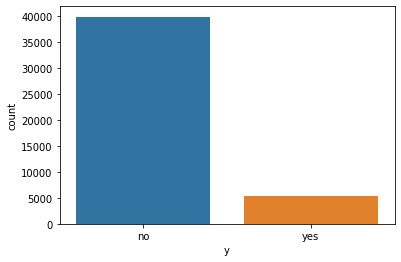

In [179]:
sns.countplot(x='y',data=df)

The people who are not deposited  are more than compared to the people deposited

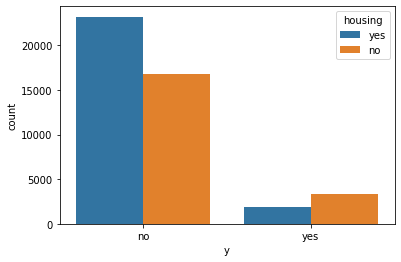

In [180]:
sns.countplot(x='y',hue='housing',data=df1)

People are not subsctribed for the deposit and also didn't taken the housing loan,But some people are subscribed for the deposit still didn't take the housing loan ,so they can offer then housing loan .    
Simlilarly people who taken housing loan but did't subscribed for the deposit ,bank can offer them the new deposit schemes so that may attract if they offer good interest on the deposit schemes  

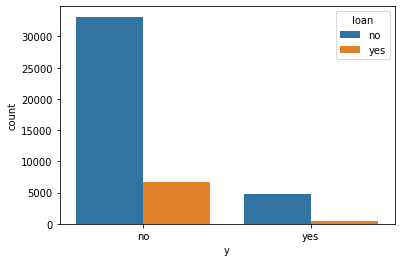

In [181]:
sns.countplot(x='y',hue='loan',data=df1)

There are more people who didn't take the loan but they subscribed for the deposit,so Bank can offer them to take loan.

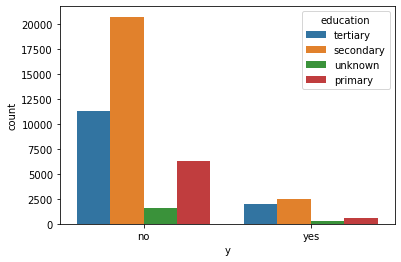

In [182]:
sns.countplot(x='y',hue='education',data=df1)

People who are studying secondary education subscribed for the deposit

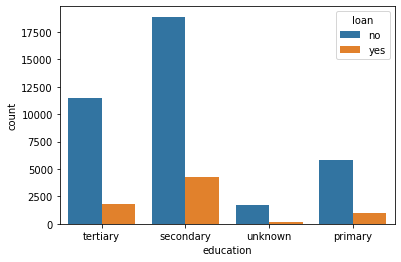

In [183]:
sns.countplot(x='education',hue='loan',data=df)

People who are studying secondary and teritary need loan ,but most of people didn't took the laoan so if bank offers them the education loan people might show interest.

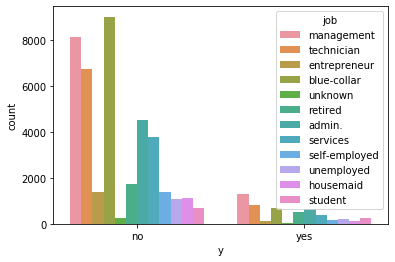

In [184]:
sns.countplot(x='y',hue='job',data=df)

Most of the people who subscribed to the deposit are doing  management job,followed by technician job.Whereas students didn't subscribed for the deposit 

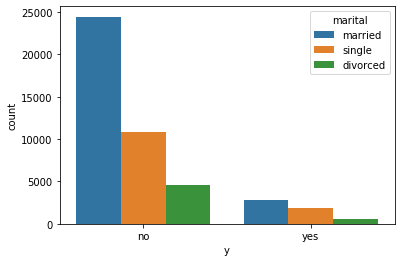

In [186]:
sns.countplot(x='y',hue='marital',data=df)

People who subscribed for the term deposit are mostly married,whereas divorced people didn't shows any interest on deposit

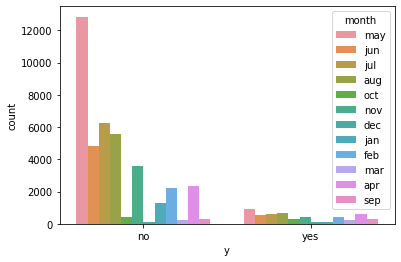

In [187]:
sns.countplot(x='y',hue='month',data=df)

most people whom last contacted at May and August has subscribed most for the term deposit,whereas whom last contacted at December did't subscribed for the term deposit

Text(0.5, 1.0, 'Distribution of age')

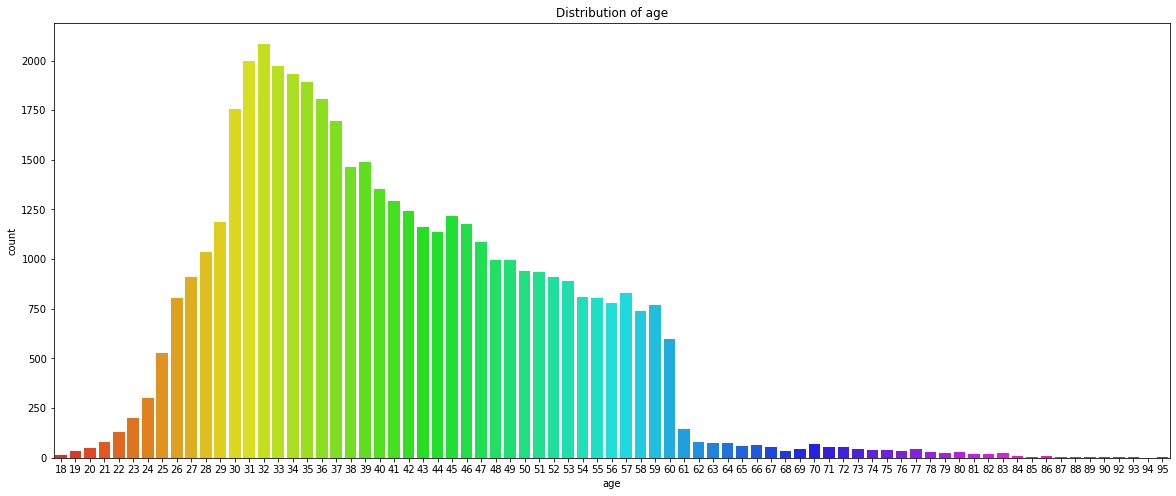

In [188]:
plt.figure(figsize=(20,8))
sns.countplot(df['age'],palette='hsv')
plt.title('Distribution of age')

People whose age is between <b>30 to 45 </b> subscribed most for the term deposit

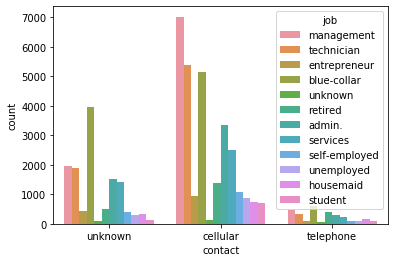

In [189]:
sns.countplot(x='contact',hue='job',data=df)

More management people didn't provide the contact details 

In [190]:
df1.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [191]:
def cleaning(df):
    col_trans=ColumnTransformer(transformers=[('oe',ce.ordinal.OrdinalEncoder(),['job','contact','education','marital','default','housing','loan','month','poutcome','y'])],remainder='drop',n_jobs=-1)
    x_train_transformed=col_trans.fit_transform(df)
    cleaned_data=x_train_transformed.tolist()
    df=df.drop(['education','contact','job','marital','default','housing','loan','month','poutcome','y'],axis=1)
    data=pd.DataFrame(cleaned_data)
    order=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
    data.columns=order
    horizontal_stack=pd.concat([df,data],axis=1)
    return horizontal_stack
def training(x,y):
    clf=GradientBoostingClassifier(n_estimators=100,max_depth=7,min_samples_split=4)
    train=clf.fit(x,y)
    return train
def testing(x,y):
    yhat=trained_model.predict(x)
    score=accuracy_score(y,yhat)
    conf=confusion_matrix(yhat,y_test)
    print('confuion_matrix \n:',conf)
    sns.heatmap(conf,annot=True)
    print('classsification report:\n',classification_report(yhat,y_test))
    return score
    


    

    

In [192]:
data=cleaning(df1)

In [193]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,1,1,1,1,1,1,1,1,1,1
1,44,29,5,151,1,-1,0,2,1,2,2,1,1,1,1,1,1
2,33,2,5,76,1,-1,0,3,1,2,1,1,1,2,1,1,1
3,47,1506,5,92,1,-1,0,4,1,3,1,1,1,1,1,1,1
4,33,1,5,198,1,-1,0,5,1,3,2,1,2,1,1,1,1


In [194]:
x=data.iloc[:,0:16]
y=data.iloc[:,-1]

In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [196]:
trained_model=training(x_train,y_train)

confuion_matrix 
: [[7654  560]
 [ 298  531]]
classsification report:
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      8214
           2       0.49      0.64      0.55       829

    accuracy                           0.91      9043
   macro avg       0.72      0.79      0.75      9043
weighted avg       0.92      0.91      0.91      9043



0.9051199823067566

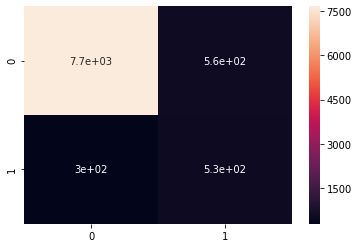

In [197]:
accuracy_test=testing(x_test,y_test)
accuracy_test